In [1]:
#https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras/notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical
import seaborn as sns


Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('data-all.csv',sep=';')
del dataset['id']
del dataset['size_vector']
del dataset['comp_opt']
dataset.head(10)

,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_TCH,PAPI_L1_TCM,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
0,Copy_E,12251,5748,1021,33908,5748,10137937,18757494,14848,27599,...,949383,8222785,142,4162,4619,21541,13665,2041,2041,13665
1,Copy_E,10928,2553,92,26995,2553,4608640,8406828,21272,23431,...,824921,6040264,81,4124,2093,19197,12489,1234,1234,12489
2,Copy_E,11293,3279,109,27715,3279,4881007,8938836,22956,23334,...,798175,6304764,81,4172,2129,19509,12659,1205,1205,12659
3,Copy_E,10815,2129,90,25858,2129,4475231,8191044,22352,23032,...,797604,6138410,81,4179,1931,19087,12390,1112,1112,12390
4,Copy_E,10929,2309,88,26605,2309,4557176,8288370,22423,22943,...,892885,5843362,81,4122,2098,19281,12548,1248,1248,12548
5,Copy_E,10889,2659,78,27138,2659,4532534,8247600,22372,23155,...,805694,6566140,83,4177,1760,18862,12229,1064,1064,12229
6,Copy_E,10817,2085,77,26290,2085,4448673,8099928,22246,23146,...,797828,5907661,81,4131,2021,19286,12507,1186,1186,12507
7,Copy_E,10866,2408,88,26547,2408,4537058,8257932,22171,23343,...,804726,6201797,81,4172,1805,19100,12404,1081,1081,12404
8,Copy_E,10801,2432,88,26616,2432,4591548,8369388,22522,23175,...,780495,5927289,81,4156,1924,19063,12378,1116,1116,12378
9,Copy_E,10924,2420,93,26412,2420,4549088,8299638,22350,23446,...,791824,5891013,81,4118,2237,19533,12685,1344,1344,12685


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344000 entries, 0 to 1343999
Data columns (total 58 columns):
label           1344000 non-null object
PAPI_L1_DCM     1344000 non-null int64
PAPI_L2_TCM     1344000 non-null int64
PAPI_L3_TCM     1344000 non-null int64
PAPI_L2_TCA     1344000 non-null int64
PAPI_L3_TCA     1344000 non-null int64
PAPI_TOT_INS    1344000 non-null int64
PAPI_REF_CYC    1344000 non-null int64
PAPI_L2_TCH     1344000 non-null int64
PAPI_L1_TCM     1344000 non-null int64
PAPI_L2_ICH     1344000 non-null int64
PAPI_L1_ICA     1344000 non-null int64
PAPI_L1_ICR     1344000 non-null int64
PAPI_L1_ICH     1344000 non-null int64
PAPI_L2_DCA     1344000 non-null int64
PAPI_L3_LDM     1344000 non-null int64
PAPI_DP_OPS     1344000 non-null int64
PAPI_FP_INS     1344000 non-null int64
PAPI_VEC_SP     1344000 non-null int64
PAPI_VEC_DP     1344000 non-null int64
PAPI_SP_OPS     1344000 non-null int64
PAPI_L1_ICM     1344000 non-null int64
PAPI_L2_DCM     1344000 non-

In [4]:
y = dataset.iloc[:,0].values
print(y)
del dataset['label']

['Copy_E' 'Copy_E' 'Copy_E' ... '2PStencil_E' '2PStencil_E' '2PStencil_E']


In [5]:
dataset = dataset.reindex_axis(sorted(dataset.columns), axis=1)
dataset

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_INS,PAPI_BR_MSP,PAPI_BR_NTK,PAPI_BR_PRC,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_INS,PAPI_FP_OPS,...,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TLB_IM,PAPI_TLB_TL,PAPI_TOT_CYC,PAPI_TOT_IIS,PAPI_TOT_INS,PAPI_VEC_DP,PAPI_VEC_SP
0,1422337,1561181,1718,789823,1496913,771358,8461,9,9,142,...,0,90063,154,63,217,8222785,3506713,10137937,0,0
1,988979,1127621,1378,573302,959500,554319,8147,9,9,81,...,0,88745,52,18,70,6040264,2764113,4608640,0,0
2,939889,1084136,1444,552733,967253,531403,8157,9,9,81,...,0,88745,34,15,49,6304764,2424221,4881007,0,0
3,936446,1080687,1336,551002,967835,529685,8168,9,9,81,...,0,88756,42,12,54,6138410,2505785,4475231,0,0
4,962314,1108096,1347,565022,950482,543074,8188,9,9,81,...,0,88754,279,117,396,5843362,2999038,4557176,0,0
5,938326,1082755,1364,551383,956828,531372,8148,9,9,83,...,0,88745,35,15,50,6566140,2595705,4532534,0,0
6,945701,1088143,1352,553536,970157,534607,8174,9,9,81,...,0,88745,29,13,42,5907661,2525821,4448673,0,0
7,928669,1073175,1330,546958,937306,526217,8195,9,9,81,...,0,88756,30,8,38,6201797,2466153,4537058,0,0
8,899694,1081760,1717,563219,1197821,518541,8149,9,9,81,...,0,88745,38,12,50,5927289,2426239,4591548,0,0
9,930628,1115521,1397,576395,951695,539126,8213,9,9,81,...,0,88745,34,14,48,5891013,2379714,4549088,0,0


In [6]:
X = dataset.values
print(X)

[[ 1422337  1561181     1718 ... 10137937        0        0]
 [  988979  1127621     1378 ...  4608640        0        0]
 [  939889  1084136     1444 ...  4881007        0        0]
 ...
 [  875239  1025099     1261 ...  3988360        0        0]
 [  860663  1014847     1288 ...  3998422        0        0]
 [  893786  1043283     1349 ...  4064381        0        0]]


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scaled =  scaler_x.transform(X)
#print (X_scaled)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_enc = encoder.fit_transform(y)
#print(y1)
Y = pd.get_dummies(y_enc).values
#print(Y)

In [9]:
encoder.inverse_transform([0,1,2,3,4,5])

array(['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E',
       'Triad_E'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0) 

In [11]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD,Adam


model = Sequential()

In [12]:
model.add(Dense(120,input_shape=(57,),activation='tanh'))
model.add(Dense(150,activation='tanh'))
model.add(Dense(60,activation='tanh'))
model.add(Dense(6,activation='softmax'))

In [13]:
model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               6960      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               18150     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                9060      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 366       
Total params: 34,536
Trainable params: 34,536
Non-trainable params: 0
_________________________________________________________________


In [15]:
#fitting the model and predicting 
history = model.fit(X_scaled,Y,batch_size=100,epochs=1000,shuffle=1,validation_split=0.20)

Train on 1075200 samples, validate on 268800 samples
Epoch 1/1000
1075200/1075200 [==============================] - 42s 39us/step - loss: 0.3631 - acc: 0.8656 - val_loss: 0.4606 - val_acc: 0.8140
Epoch 2/1000
1075200/1075200 [==============================] - 43s 40us/step - loss: 0.1732 - acc: 0.9340 - val_loss: 0.2895 - val_acc: 0.8698
Epoch 3/1000
1075200/1075200 [==============================] - 43s 40us/step - loss: 0.1346 - acc: 0.9460 - val_loss: 0.3032 - val_acc: 0.8850
Epoch 4/1000
1075200/1075200 [==============================] - 37s 34us/step - loss: 0.0772 - acc: 0.9688 - val_loss: 0.1727 - val_acc: 0.9255
Epoch 9/1000
1075200/1075200 [==============================] - 32s 30us/step - loss: 0.0709 - acc: 0.9714 - val_loss: 0.4101 - val_acc: 0.8684
Epoch 10/1000
1075200/1075200 [==============================] - 50s 46us/step - loss: 0.0668 - acc: 0.9733 - val_loss: 0.1837 - val_acc: 0.9235
Epoch 11/1000
1075200/1075200 [==============================] - 42s 39us/step - l

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0238 - acc: 0.9913 - val_loss: 0.3469 - val_acc: 0.9043
Epoch 62/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0239 - acc: 0.9912 - val_loss: 0.3189 - val_acc: 0.9115
Epoch 63/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0238 - acc: 0.9912 - val_loss: 0.3882 - val_acc: 0.8958
Epoch 64/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0232 - acc: 0.9915 - val_loss: 0.1392 - val_acc: 0.9462
Epoch 65/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0229 - acc: 0.9916 - val_loss: 0.1755 - val_acc: 0.9382
Epoch 66/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0236 - acc: 0.9913 - val_loss: 0.2231 - val_acc: 0.9310
Epoch 67/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0229 - acc: 0.9915 - val_loss: 0.3220 - val_acc: 0.9104

1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0165 - acc: 0.9942 - val_loss: 0.1788 - val_acc: 0.9465
Epoch 118/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0165 - acc: 0.9941 - val_loss: 0.3582 - val_acc: 0.9142
Epoch 119/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0165 - acc: 0.9942 - val_loss: 0.1622 - val_acc: 0.9456
Epoch 120/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0159 - acc: 0.9943 - val_loss: 0.1867 - val_acc: 0.9403
Epoch 121/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0167 - acc: 0.9939 - val_loss: 0.3127 - val_acc: 0.9238
Epoch 122/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0155 - acc: 0.9944 - val_loss: 0.1892 - val_acc: 0.9464
Epoch 123/1000
1075200/1075200 [==============================] - 34s 31us/step - loss: 0.0168 - acc: 0.9942 - val_loss: 0.2792 - val_acc: 

1075200/1075200 [==============================] - 34s 32us/step - loss: 0.0132 - acc: 0.9953 - val_loss: 0.2443 - val_acc: 0.9321
Epoch 174/1000
1075200/1075200 [==============================] - 35s 32us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.3115 - val_acc: 0.9267
Epoch 175/1000
1075200/1075200 [==============================] - 34s 32us/step - loss: 0.0133 - acc: 0.9952 - val_loss: 0.2519 - val_acc: 0.9353
Epoch 176/1000
1075200/1075200 [==============================] - 34s 32us/step - loss: 0.0131 - acc: 0.9954 - val_loss: 0.1865 - val_acc: 0.9470
Epoch 177/1000
1075200/1075200 [==============================] - 34s 31us/step - loss: 0.0131 - acc: 0.9954 - val_loss: 0.2167 - val_acc: 0.9395
Epoch 178/1000
1075200/1075200 [==============================] - 34s 32us/step - loss: 0.0132 - acc: 0.9953 - val_loss: 0.2595 - val_acc: 0.9350
Epoch 179/1000
1075200/1075200 [==============================] - 35s 32us/step - loss: 0.0130 - acc: 0.9953 - val_loss: 0.2701 - val_acc: 

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0110 - acc: 0.9962 - val_loss: 0.2921 - val_acc: 0.9331
Epoch 230/1000
1075200/1075200 [==============================] - 32s 30us/step - loss: 0.0112 - acc: 0.9960 - val_loss: 0.3355 - val_acc: 0.9205
Epoch 231/1000
1075200/1075200 [==============================] - 34s 31us/step - loss: 0.0110 - acc: 0.9963 - val_loss: 0.2243 - val_acc: 0.9378
Epoch 232/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0118 - acc: 0.9959 - val_loss: 0.4394 - val_acc: 0.9098
Epoch 233/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.2702 - val_acc: 0.9340
Epoch 234/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0109 - acc: 0.9962 - val_loss: 0.2908 - val_acc: 0.9332
Epoch 235/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0107 - acc: 0.9963 - val_loss: 0.3666 - val_acc: 

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0094 - acc: 0.9967 - val_loss: 0.1978 - val_acc: 0.9452
Epoch 286/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0107 - acc: 0.9962 - val_loss: 0.2169 - val_acc: 0.9441
Epoch 287/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.2430 - val_acc: 0.9387
Epoch 288/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0100 - acc: 0.9965 - val_loss: 0.3515 - val_acc: 0.9220
Epoch 289/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0099 - acc: 0.9966 - val_loss: 0.3629 - val_acc: 0.9176
Epoch 290/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0095 - acc: 0.9966 - val_loss: 0.3236 - val_acc: 0.9247
Epoch 291/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0097 - acc: 0.9966 - val_loss: 0.3245 - val_acc: 

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0092 - acc: 0.9968 - val_loss: 0.2119 - val_acc: 0.9412
Epoch 342/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0096 - acc: 0.9967 - val_loss: 0.3327 - val_acc: 0.9243
Epoch 343/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0088 - acc: 0.9969 - val_loss: 0.2828 - val_acc: 0.9361
Epoch 344/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0096 - acc: 0.9967 - val_loss: 0.2393 - val_acc: 0.9332
Epoch 345/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.3643 - val_acc: 0.9272
Epoch 346/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0091 - acc: 0.9968 - val_loss: 0.2421 - val_acc: 0.9424
Epoch 347/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0086 - acc: 0.9970 - val_loss: 0.1830 - val_acc: 

1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0084 - acc: 0.9971 - val_loss: 0.3406 - val_acc: 0.9245
Epoch 398/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.2303 - val_acc: 0.9397
Epoch 399/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.2130 - val_acc: 0.9502
Epoch 400/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.1233 - val_acc: 0.9622
Epoch 401/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.2552 - val_acc: 0.9369
Epoch 402/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.1866 - val_acc: 0.9486
Epoch 403/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.2697 - val_acc: 

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.2456 - val_acc: 0.9341
Epoch 454/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0077 - acc: 0.9973 - val_loss: 0.2295 - val_acc: 0.9410
Epoch 455/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.2344 - val_acc: 0.9436
Epoch 456/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.2639 - val_acc: 0.9391
Epoch 457/1000
1075200/1075200 [==============================] - 32s 30us/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.1834 - val_acc: 0.9494
Epoch 458/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0076 - acc: 0.9974 - val_loss: 0.2817 - val_acc: 0.9327
Epoch 459/1000
1075200/1075200 [==============================] - 33s 30us/step - loss: 0.0081 - acc: 0.9972 - val_loss: 0.2317 - val_acc: 

1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0069 - acc: 0.9976 - val_loss: 0.2796 - val_acc: 0.9362
Epoch 510/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.2037 - val_acc: 0.9488
Epoch 511/1000
1075200/1075200 [==============================] - 34s 31us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.2359 - val_acc: 0.9452
Epoch 512/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.3145 - val_acc: 0.9322
Epoch 513/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.3718 - val_acc: 0.9203
Epoch 514/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0076 - acc: 0.9973 - val_loss: 0.2048 - val_acc: 0.9498
Epoch 515/1000
1075200/1075200 [==============================] - 33s 31us/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.1719 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.2341 - val_acc: 0.9444
Epoch 566/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0067 - acc: 0.9977 - val_loss: 0.2992 - val_acc: 0.9346
Epoch 567/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.2765 - val_acc: 0.9303
Epoch 568/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0069 - acc: 0.9976 - val_loss: 0.3393 - val_acc: 0.9336
Epoch 569/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.2075 - val_acc: 0.9492
Epoch 570/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0071 - acc: 0.9976 - val_loss: 0.2377 - val_acc: 0.9435
Epoch 571/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.3113 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.2325 - val_acc: 0.9446
Epoch 622/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.2973 - val_acc: 0.9321
Epoch 623/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.3389 - val_acc: 0.9259
Epoch 624/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0069 - acc: 0.9977 - val_loss: 0.3843 - val_acc: 0.9255
Epoch 625/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.4978 - val_acc: 0.9127
Epoch 626/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0067 - acc: 0.9977 - val_loss: 0.2537 - val_acc: 0.9458
Epoch 627/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0067 - acc: 0.9977 - val_loss: 0.2501 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.3190 - val_acc: 0.9331
Epoch 678/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.2907 - val_acc: 0.9392
Epoch 679/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.2971 - val_acc: 0.9347
Epoch 680/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.2998 - val_acc: 0.9336
Epoch 681/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.2545 - val_acc: 0.9398
Epoch 682/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.2972 - val_acc: 0.9291
Epoch 683/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.3907 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.2983 - val_acc: 0.9377
Epoch 734/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.3599 - val_acc: 0.9318
Epoch 735/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.2127 - val_acc: 0.9462
Epoch 736/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.2465 - val_acc: 0.9479
Epoch 737/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.2483 - val_acc: 0.9404
Epoch 738/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.2258 - val_acc: 0.9494
Epoch 739/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.2701 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.2175 - val_acc: 0.9483
Epoch 790/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.2063 - val_acc: 0.9549
Epoch 791/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.2683 - val_acc: 0.9440
Epoch 792/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.2619 - val_acc: 0.9412
Epoch 793/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.1979 - val_acc: 0.9498
Epoch 794/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.3275 - val_acc: 0.9312
Epoch 795/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.2053 - val_acc: 

1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.2435 - val_acc: 0.9422
Epoch 846/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.2676 - val_acc: 0.9399
Epoch 847/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.2814 - val_acc: 0.9401
Epoch 848/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0058 - acc: 0.9981 - val_loss: 0.2379 - val_acc: 0.9455
Epoch 849/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.3154 - val_acc: 0.9277
Epoch 850/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.2559 - val_acc: 0.9421
Epoch 851/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.2834 - val_acc: 

1075200/1075200 [==============================] - 31s 28us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.2964 - val_acc: 0.9410
Epoch 902/1000
1075200/1075200 [==============================] - 30s 28us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.2673 - val_acc: 0.9405
Epoch 903/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0055 - acc: 0.9981 - val_loss: 0.3763 - val_acc: 0.9309
Epoch 904/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.2148 - val_acc: 0.9451
Epoch 905/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0055 - acc: 0.9981 - val_loss: 0.3385 - val_acc: 0.9299
Epoch 906/1000
1075200/1075200 [==============================] - 29s 27us/step - loss: 0.0054 - acc: 0.9981 - val_loss: 0.2917 - val_acc: 0.9362
Epoch 907/1000
1075200/1075200 [==============================] - 30s 27us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.2725 - val_acc: 

1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.2642 - val_acc: 0.9391
Epoch 958/1000
1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.2388 - val_acc: 0.9449
Epoch 959/1000
1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.2552 - val_acc: 0.9413
Epoch 960/1000
1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.2580 - val_acc: 0.9474
Epoch 961/1000
1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0053 - acc: 0.9981 - val_loss: 0.2931 - val_acc: 0.9380
Epoch 962/1000
1075200/1075200 [==============================] - 19s 17us/step - loss: 0.0055 - acc: 0.9982 - val_loss: 0.3327 - val_acc: 0.9376
Epoch 963/1000
1075200/1075200 [==============================] - 19s 18us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.2772 - val_acc: 

In [16]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     44782
           1       0.98      0.98      0.98     44906
           2       0.99      1.00      1.00     44725
           3       1.00      1.00      1.00     44750
           4       0.99      0.99      0.99     44642
           5       0.99      0.97      0.98     44995

   micro avg       0.99      0.99      0.99    268800
   macro avg       0.99      0.99      0.99    268800
weighted avg       0.99      0.99      0.99    268800

[[44281   168     4    43    79   207]
 [    4 44172   185     0   320   225]
 [    0     1 44724     0     0     0]
 [    0     1     1 44748     0     0]
 [   10   198   224     1 44174    35]
 [ 1020   392     2     0   145 43436]]


[6.0, 4.0]


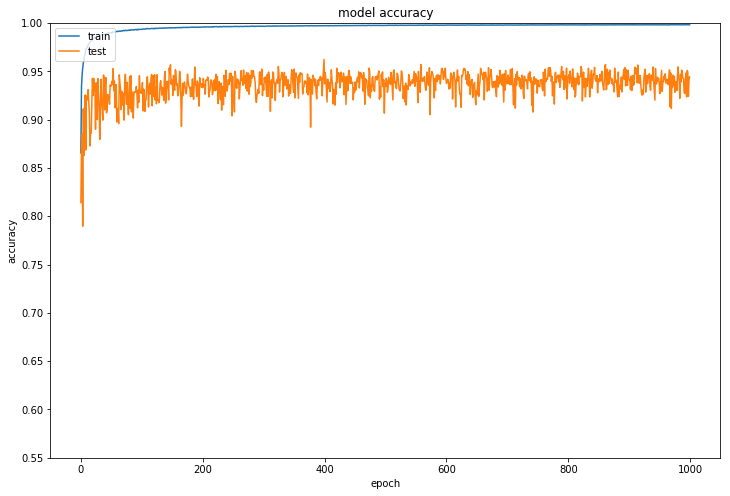

In [17]:
#print(history.history.keys())
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size=[12.0,8.0]
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0.55,1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


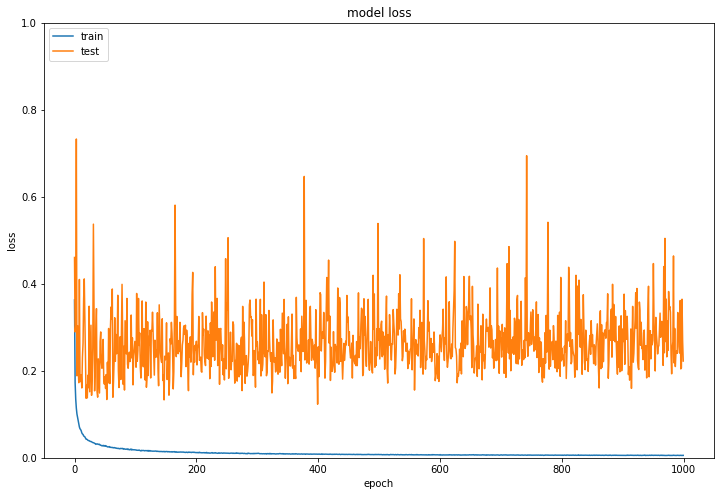

In [18]:
plt.ylim(0.0,1)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save('my_model_all.h5')
#mode.load('my_model.h5')

In [20]:
dataset_pred_in = pd.read_csv('nofusion-data-all.csv',sep=';')
del dataset_pred_in['id']
del dataset_pred_in['size vector']
del dataset_pred_in['comp opt']
#Scale_E

In [21]:
dataset_pred = dataset_pred_in[dataset_pred_in.label ==  'Reduction_E']

In [22]:
dataset_pred.head(10)

,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_TCH,PAPI_L1_TCM,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,Reduction_E,4335,3224,180,20224,3224,4720101,8611992,14921,17670,...,920321,6025889,8560,450,2285,17033,13293,1217,1217,13293
3,Reduction_E,3564,2003,135,18069,2003,4454475,8116092,14975,16314,...,893800,6394376,8568,480,1850,16322,13051,1028,1028,13051
5,Reduction_E,3812,2223,181,18827,2223,4435201,8171442,15472,16665,...,899728,5888279,8568,458,1621,16316,13036,871,871,13036
7,Reduction_E,3615,1952,136,18214,1952,4399947,8015562,15187,16154,...,907398,5890632,8573,473,1644,15989,12749,843,843,12749
9,Reduction_E,3670,2090,127,18384,2090,4405888,8027856,15556,16779,...,896265,5809757,8567,470,1782,16310,12945,905,905,12945
11,Reduction_E,3683,2246,132,18613,2246,4421703,8071956,15299,16535,...,900188,6130305,8566,484,1677,16205,12888,862,862,12888
13,Reduction_E,3789,2080,136,18576,2080,4376487,7962516,15459,16496,...,895835,5840230,8559,466,1807,16152,12837,952,952,12837
15,Reduction_E,3820,2189,135,18908,2189,4430999,8083692,15165,16488,...,890505,5854642,8562,473,1655,16173,12921,842,842,12921
17,Reduction_E,4270,2520,239,19664,2520,4465230,8344764,15275,16623,...,904487,5787816,8561,461,1635,15925,12747,861,861,12747
19,Reduction_E,3736,2249,141,18352,2249,4432527,8085636,15156,16713,...,893139,6073128,8557,472,1914,16662,13271,1023,1023,13271


In [23]:
#dataset_pred.info()

In [24]:
y_pred = dataset_pred.iloc[:,0].values
print(y_pred)
del dataset_pred['label']

['Reduction_E' 'Reduction_E' 'Reduction_E' ... 'Reduction_E' 'Reduction_E'
 'Reduction_E']


In [25]:
dataset_pred = dataset_pred.reindex_axis(sorted(dataset_pred.columns), axis=1)
dataset_pred

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_INS,PAPI_BR_MSP,PAPI_BR_NTK,PAPI_BR_PRC,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_INS,PAPI_FP_OPS,...,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TLB_IM,PAPI_TLB_TL,PAPI_TOT_CYC,PAPI_TOT_IIS,PAPI_TOT_INS,PAPI_VEC_DP,PAPI_VEC_SP
1,911164,1074695,1840,540605,949813,534090,25411,0,8483,8560,...,8483,139343,109,115,224,6025889,3171088,4720101,0,0
3,889734,1055276,1699,530261,926269,525015,25443,0,8492,8568,...,8492,139338,56,14,70,6394376,3055019,4454475,0,0
5,872607,1039085,1622,522439,887373,516646,25405,0,8491,8568,...,8491,139349,43,14,57,5888279,3015630,4435201,0,0
7,882318,1048984,1690,527557,906450,521427,25487,0,8497,8573,...,8497,139335,60,14,74,5890632,3014387,4399947,0,0
9,878532,1045989,1670,526084,916784,519905,25492,0,8495,8567,...,8495,139338,49,9,58,5809757,2947966,4405888,0,0
11,864172,1033139,1643,519920,893448,513219,25334,0,8481,8566,...,8481,139347,54,17,71,6130305,3052780,4421703,0,0
13,871634,1042876,1696,525371,911442,517505,25406,0,8485,8559,...,8485,139335,51,9,60,5840230,2828725,4376487,0,0
15,868481,1043958,1639,527328,922288,516630,25350,0,8488,8562,...,8488,139338,48,9,57,5854642,2933712,4430999,0,0
17,888449,1057901,1595,532779,892836,525122,25366,0,8485,8561,...,8485,139346,49,10,59,5787816,3033614,4465230,0,0
19,857537,1026083,1672,516561,911360,509522,25393,0,8486,8557,...,8486,139335,50,9,59,6073128,2923493,4432527,0,0


In [26]:
X_pred = dataset_pred.values
print(X_pred)

[[ 911164 1074695    1840 ... 4720101       0       0]
 [ 889734 1055276    1699 ... 4454475       0       0]
 [ 872607 1039085    1622 ... 4435201       0       0]
 ...
 [ 888760 1031163    1392 ... 3809630       0       0]
 [ 851681  995149    1374 ... 3790024       0       0]
 [ 849468  995349    1347 ... 3787948       0       0]]


In [27]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
predictions = model.predict_classes(X_pred_scaled)
predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [29]:
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [30]:
predictioni_ = encoder.inverse_transform(prediction_)
predictioni_


array(['Copy_E', 'Copy_E', 'Copy_E', ..., 'Copy_E', 'Copy_E', 'Copy_E'],
      dtype=object)

In [31]:
func_vec = ['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E','Triad_E']
pred_vec= [0]*6
print(pred_vec)
for i in prediction_:
    pred_vec[i] = pred_vec[i] + 1
print(pred_vec)

[0, 0, 0, 0, 0, 0]
[1462, 11365, 59609, 0, 19392, 16172]


In [32]:
total = sum(pred_vec)
for i in range(6):
    print("Predicted {} \t {}%".format(func_vec[i],pred_vec[i]*100/total))

Predicted 2PStencil_E 	 1.3537037037037036%
Predicted Add_E 	 10.523148148148149%
Predicted Copy_E 	 55.193518518518516%
Predicted Reduction_E 	 0.0%
Predicted Scale_E 	 17.955555555555556%
Predicted Triad_E 	 14.974074074074075%


In [33]:
dataset_pred = dataset_pred_in[dataset_pred_in.label ==  '2PStencil_E']
dataset_pred.head(10)

,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_TCH,PAPI_L1_TCM,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
0,2PStencil_E,10236,13575,2800,33403,13575,27945127,53529048,13888,30014,...,3847043,39454717,34292,1622,13437,28384,19342,7070,7070,19342
2,2PStencil_E,4069,2307,129,19102,2307,4762037,8178804,15094,16597,...,1084416,6029633,33944,870,1749,16418,13200,951,951,13200
4,2PStencil_E,3862,2087,88,18733,2087,4720510,8097444,15508,16832,...,1088193,5920935,33933,754,1549,15959,12904,811,811,12904
6,2PStencil_E,4035,2734,94,19320,2734,4910543,8467956,15168,16568,...,1074321,5876678,33950,692,1776,16169,12963,981,981,12963
8,2PStencil_E,3826,1860,88,18735,1860,4670004,8001450,15517,16941,...,1082541,6199349,33955,729,1690,16473,13234,942,942,13234
10,2PStencil_E,3909,2281,101,19059,2281,4767905,8200674,15424,16562,...,1075579,5947963,33944,679,1613,15927,12802,860,860,12802
12,2PStencil_E,3805,1905,93,18965,1905,4647417,7968258,14999,16297,...,1070828,5915414,33955,759,1675,16227,13014,898,898,13014
14,2PStencil_E,3905,2162,93,18987,2162,4782939,8214444,15313,16614,...,1087424,5872186,33944,704,1568,15944,12825,857,857,12825
16,2PStencil_E,3841,1980,99,18923,1980,4666290,8071146,15387,16778,...,1078496,6655939,33942,790,1836,16443,13202,1023,1023,13202
18,2PStencil_E,3922,2136,95,19132,2136,4761221,8183196,15504,16575,...,1069815,5894381,33963,705,1579,16181,13040,832,832,13040


In [34]:
y_pred = dataset_pred.iloc[:,0].values
print(y)
del dataset_pred['label']

['Copy_E' 'Copy_E' 'Copy_E' ... '2PStencil_E' '2PStencil_E' '2PStencil_E']


In [35]:
dataset_pred = dataset_pred.reindex_axis(sorted(dataset_pred.columns), axis=1)
dataset_pred

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_INS,PAPI_BR_MSP,PAPI_BR_NTK,PAPI_BR_PRC,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_INS,PAPI_FP_OPS,...,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TLB_IM,PAPI_TLB_TL,PAPI_TOT_CYC,PAPI_TOT_IIS,PAPI_TOT_INS,PAPI_VEC_DP,PAPI_VEC_SP
0,5709802,5878029,4133,2945822,6954440,2932207,27074,0,33894,34292,...,33894,163444,1103,988,2091,39454717,18845066,27945127,0,0
2,858728,1022173,1596,517603,893103,504570,25202,0,33868,33944,...,33868,156304,54,9,63,6029633,3377985,4762037,0,0
4,877974,1048512,1540,532734,896826,515778,25192,0,33860,33933,...,33860,156292,54,12,66,5920935,3347319,4720510,0,0
6,869925,1037059,1557,526240,914223,510819,25241,0,33863,33950,...,33863,156292,45,12,57,5876678,3141122,4910543,0,0
8,859193,1028192,1517,521999,879729,506193,25198,0,33856,33955,...,33856,156304,45,11,56,6199349,3235279,4670004,0,0
10,875989,1046098,1624,531416,900774,514682,25253,0,33866,33944,...,33866,156292,53,12,65,5947963,3249818,4767905,0,0
12,855580,1025076,1560,520562,929921,504514,25218,0,33858,33955,...,33858,156292,52,10,62,5915414,3211112,4647417,0,0
14,888735,1057878,1561,536957,884122,520921,25223,0,33868,33944,...,33868,156303,53,11,64,5872186,3317428,4782939,0,0
16,848914,1020203,1608,518445,907237,501758,25210,0,33863,33942,...,33863,156292,44,7,51,6655939,3234101,4666290,0,0
18,845940,1014444,1584,515744,912046,498700,25201,0,33857,33963,...,33857,156292,53,10,63,5894381,3154159,4761221,0,0


In [36]:
X_pred = dataset_pred.values
print(X_pred)

[[ 5709802  5878029     4133 ... 27945127        0        0]
 [  858728  1022173     1596 ...  4762037        0        0]
 [  877974  1048512     1540 ...  4720510        0        0]
 ...
 [  858276  1003825     1347 ...  3981945        0        0]
 [  850897   997512     1401 ...  3899879        0        0]
 [  871871  1013570     1343 ...  3946719        0        0]]


In [37]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
predictions = model.predict_classes(X_pred_scaled)
predictions

array([4, 5, 5, ..., 1, 1, 1], dtype=int64)

In [39]:
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_

array([4, 5, 5, ..., 1, 1, 1], dtype=int64)

In [40]:
predictioni_ = encoder.inverse_transform(prediction_)
predictioni_


array(['Scale_E', 'Triad_E', 'Triad_E', ..., 'Add_E', 'Add_E', 'Add_E'],
      dtype=object)

In [41]:
func_vec = ['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E','Triad_E']
pred_vec= [0]*6
print(pred_vec)
for i in prediction_:
    pred_vec[i] = pred_vec[i] + 1
print(pred_vec)

[0, 0, 0, 0, 0, 0]
[62452, 4778, 7882, 0, 3578, 29310]


In [42]:
total = sum(pred_vec)
for i in range(6):
    print("Predicted {} \t {}%".format(func_vec[i],pred_vec[i]*100/total))

Predicted 2PStencil_E 	 57.82592592592592%
Predicted Add_E 	 4.424074074074074%
Predicted Copy_E 	 7.298148148148148%
Predicted Reduction_E 	 0.0%
Predicted Scale_E 	 3.312962962962963%
Predicted Triad_E 	 27.13888888888889%
